In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data=[]
element =[0,[0]]

with open('shoulder_60s.txt') as f:
    line = f.readline()
    while line:
        if (line.find("1") == 0):
            element[0]=int(line.strip())
            line = f.readline()
            if (line.find("[") == 0):
                stripped_line = line[1:].strip()
                line = f.readline()
                while (line.find("]") == -1):
                    stripped_line += " "+line.strip()
                    line = f.readline()
                if (line.find("]") > 0):
                    stripped_line += " "+line[:-2].strip()
                    element[1] = [float(k) for k in stripped_line.split()]
                    data.append(element.copy())
                    line = f.readline()
            
                

In [3]:
datanr = len(data)
tendonnr = len(data[1][1])
print("Data Points: %i \nTendons: %i" % (datanr,tendonnr))

Data Points: 3819 
Tendons: 37


In [4]:
#first nonzero element
startindices = []
for t in range(tendonnr):
    startindices.append(next((i for i, x in enumerate([n[1][t] for n in data]) if x), None))

Not_none_values = filter(None.__ne__, startindices)
startindices = list(Not_none_values)


In [5]:
#start at specific index?
startindex = min(startindices)
#start some indices before?
endindex = datanr
pruneddata = data[startindex:endindex]

In [6]:
pruneddatanr = len(pruneddata)
print("Pruned Data starts at %i and ends at %i" % (startindex,endindex))
print("Pruned Data Points: %i" % pruneddatanr)

Pruned Data starts at 307 and ends at 3819
Pruned Data Points: 3512


<function matplotlib.pyplot.show(*args, **kw)>

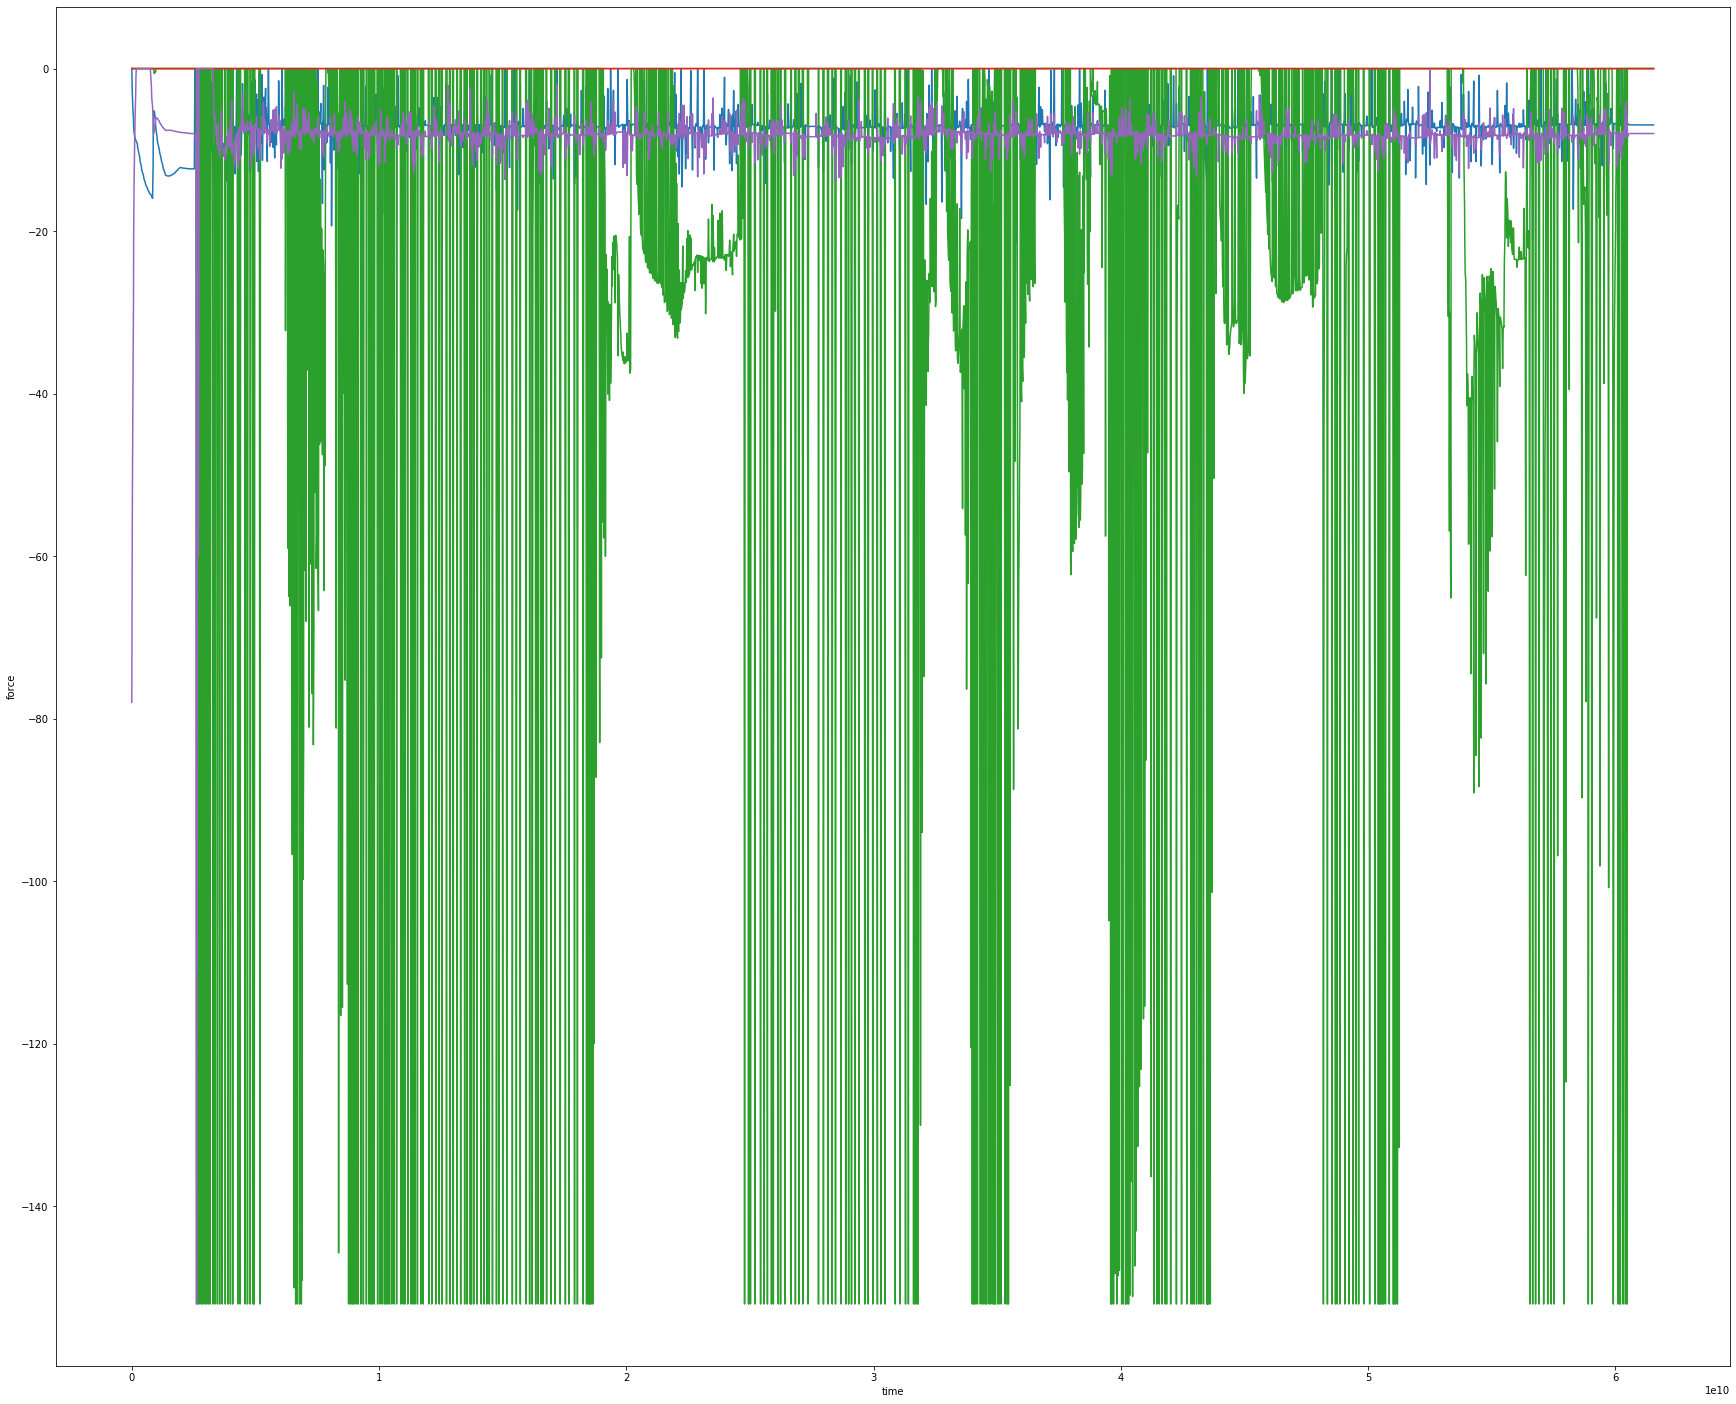

In [8]:
fig = plt.gcf()
fig.set_size_inches(30, 25)


x = [m[0] for m in pruneddata]

#start x axis with 0
tmin = min([m[0] for m in pruneddata])
x = [t - tmin for t in x]


for r in range(15,20):
    plt.plot(x,[n[1][r] for n in pruneddata])


plt.ylabel('force')
plt.xlabel('time')

plt.show